## Introduction to Seaborn

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Ensure graph loaded in Notebook
%matplotlib inline 

In [28]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [29]:
tips_df = sns.load_dataset('tips')

In [30]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Numerical Plots

* **Distribution**: Hist, KDE
* **Join Plot**
* **Pair Plot**
* **Bar Plot**
* **Count Plot**
* **Facet Plot**: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.
* **Box Plot**: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng
* **Heat Map**:một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều


### Distribution Plot
* univariate distribution of observations

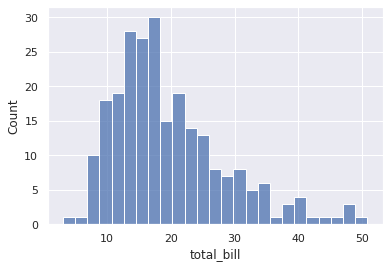

In [31]:
sns.histplot(tips_df['total_bill'], bins=25); #bins = divide data into intervals

### KDE Plot
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
* KDE represents the data using a continuous probability density curve in one or more dimensions

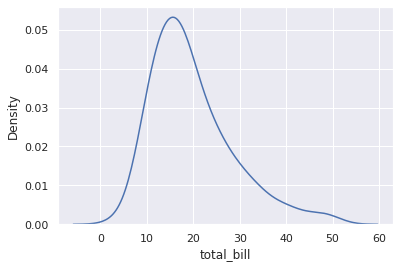

In [32]:
sns.kdeplot(tips_df['total_bill']);

### Joint Plot

* `joint` distribution between two variables along with each variable’s marginal distribution

### Styling

In [33]:
penguins = sns.load_dataset("penguins")

In [34]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [35]:
# Apply the default theme
sns.set_theme()

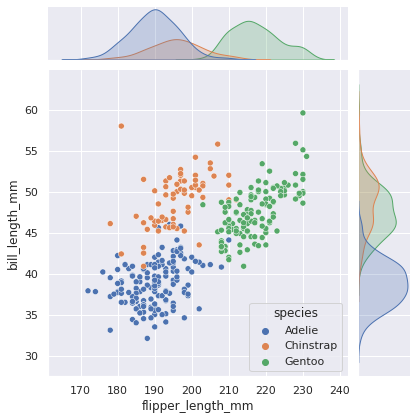

In [36]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

### Pair Plots

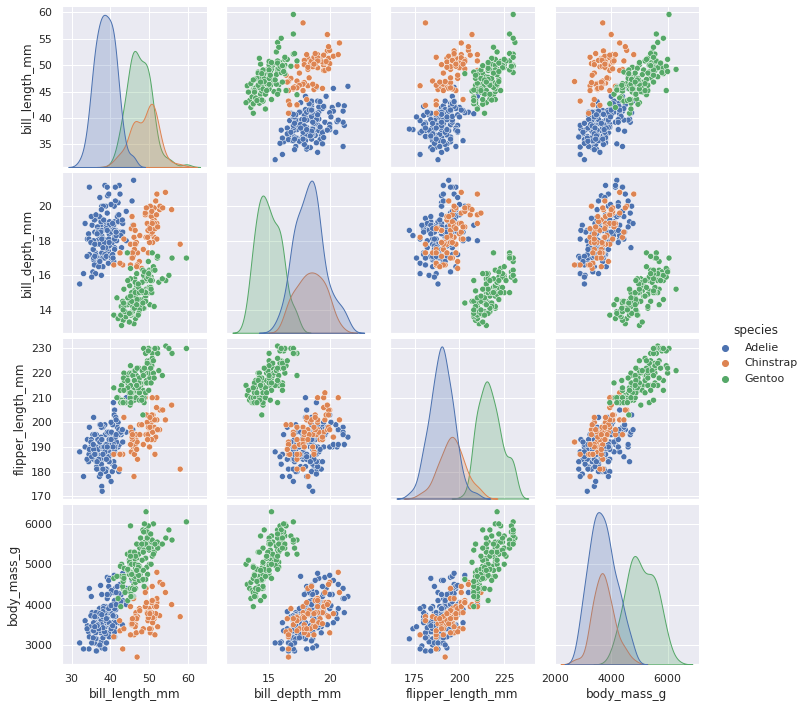

In [37]:
sns.pairplot(data=penguins, hue="species");

## Categorical Plots
### Bar Plots

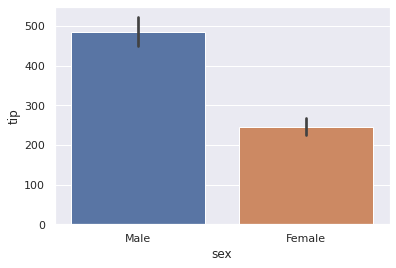

In [38]:
 #estimator by default = mean, you can pass anything you want like np.cov, np.std or even your own function
sns.barplot(x="sex", y='tip', data=tips_df, estimator=np.sum);

### Count Plot

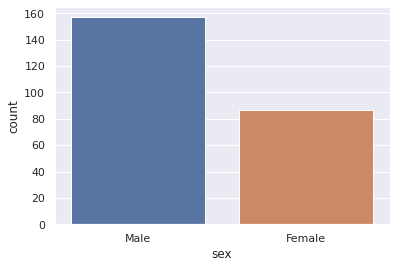

In [39]:
sns.countplot(x='sex', data=tips_df); #Count total number of Male and Female

### Facet Grid
* FacetGrid can be drawn with up to three dimensions: `row`, `col`, and `hue`.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method. 

In [40]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


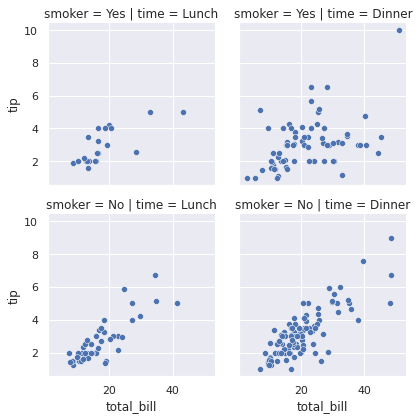

In [41]:
tips_fg = sns.FacetGrid(tips_df, col="time", row="smoker") #Create a class instance of FacetGrid class
#tips_fg.map(sns.histplot, 'total_bill', bins=10);
tips_fg.map(sns.scatterplot, 'total_bill', 'tip');

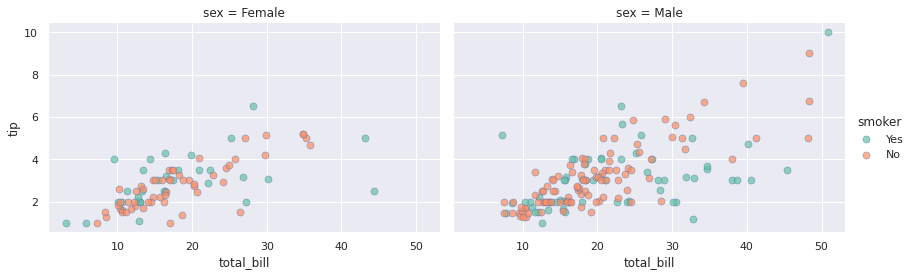

In [42]:
kws = dict(s=50, linewidth=.5, edgecolor='b',alpha=.7) #keyword arguments

tips_fg = sns.FacetGrid(tips_df, col="sex", hue="smoker", height=4, aspect=1.5, 
                        col_order=["Female", "Male"],
                        palette='Set2', #Colors to use for the different levels of the ``hue`` variable 
                        legend_out=True) 
                        
tips_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws)
tips_fg.add_legend();

### Box Plot
Box Plot is a good indication of how the values in the data are spread out
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

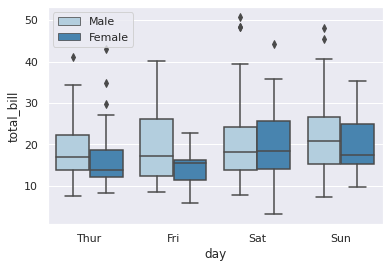

In [43]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='Blues');
#the black-dot = outliner
#palette ‘blues’ are all kinds of blue

plt.legend(loc=0); #to remove data cat

### Heatmaps
Describing density or intensity of variables, visualize patterns, variance, and even anomalies.

In [44]:
flights = sns.load_dataset('flights')

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [45]:
flights = pd.pivot_table(flights, index='month', columns='year',values='passengers')

In [46]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


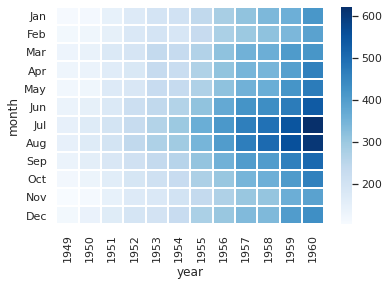

In [47]:
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1);